In [2]:
import tensorflow as tf
tf.reset_default_graph()

batch_size = 100
BatchSize = 100
lr = 0.0002
train_epoch = 20

tf.reset_default_graph()




def D_logit(x, isTrain=True): # construct discriminator structure
    # 1st hidden layer
    conv1 = tf.layers.conv2d(x, 128, [4, 4], strides=(2, 2), padding='same')
    #lrelu1 = lrelu(conv1, 0.2)
    lrelu1 = tf.nn.leaky_relu(conv1,alpha=0.2)

    # 2nd hidden layer
    conv2 = tf.layers.conv2d(lrelu1, 256, [4, 4], strides=(2, 2), padding='same')
    #lrelu2 = lrelu(tf.layers.batch_normalization(conv2, training=isTrain,activation = tf.nn.leaky_relu(alpha=0.2)), 0.2)
    bn2 = tf.layers.batch_normalization(conv2, training=isTrain)
    lrelu2 = tf.nn.leaky_relu(bn2,alpha=0.2)

    # 3rd hidden layer
    conv3 = tf.layers.conv2d(lrelu2, 512, [4, 4], strides=(2, 2), padding='same')
    #lrelu3 = lrelu(tf.layers.batch_normalization(conv3, training=isTrain), 0.2)
    lrelu3 = tf.nn.leaky_relu(conv3,alpha=0.2)

    # 4th hidden layer
    conv4 = tf.layers.conv2d(lrelu3, 1024, [4, 4], strides=(2, 2), padding='same')
    #lrelu4 = lrelu(tf.layers.batch_normalization(conv4, training=isTrain), 0.2)
    bn4 = tf.layers.batch_normalization(conv4, training=isTrain)
    lrelu4 = tf.nn.leaky_relu(bn4,alpha=0.2)
    # output layer
    
    conv5 = tf.layers.conv2d(lrelu4, 1, [4, 4], strides=(1, 1), padding='valid')
    logit = tf.nn.sigmoid(conv5)
    
    return logit,conv5


def G(x, isTrain=True): # construct generator structure
     # 1st hidden layer
    conv1 = tf.layers.conv2d_transpose(x, 1024, [4, 4], strides=(1, 1), padding='valid')
    bn1 = tf.layers.batch_normalization(conv1, training=isTrain)
    lrelu1 = tf.nn.leaky_relu(bn1,alpha=0.2)
    
    # 2nd hidden layer
    conv2 = tf.layers.conv2d_transpose(lrelu1, 512, [4, 4], strides=(2, 2), padding='same')
    bn2 = tf.layers.batch_normalization(conv2, training=isTrain)
    lrelu2 = tf.nn.leaky_relu(bn2,alpha=0.2)

    # 3rd hidden layer
    conv3 = tf.layers.conv2d_transpose(lrelu2, 256, [4, 4], strides=(2, 2), padding='same')
    bn3 = tf.layers.batch_normalization(conv3, training=isTrain)
    lrelu3 = tf.nn.leaky_relu(bn3,alpha=0.2)

    # 4th hidden layer
    conv4 = tf.layers.conv2d_transpose(lrelu3, 128, [4, 4], strides=(2, 2), padding='same')
    bn4 = tf.layers.batch_normalization(conv4, training=isTrain)
    lrelu4 = tf.nn.leaky_relu(bn4, 0.2)

    # output layer
    conv5 = tf.layers.conv2d_transpose(lrelu4, 1, [4, 4], strides=(2, 2), padding='same')
    img = tf.nn.tanh(conv5)
    return img



Z = tf.placeholder(tf.float32, [None,1,1, 100], name="latent_value")
with tf.variable_scope("Generator"):
    fake_img = G(Z)

isTrain = tf.placeholder(dtype=tf.bool)

real_img = tf.placeholder(tf.float32, [None, 64, 64, 1], name="real_image")
with tf.variable_scope("Discriminator"):
    D_real, D_logit_real = D_logit(real_img)
with tf.variable_scope("Discriminator", reuse=True):
    D_fake, D_logit_fake = D_logit(fake_img)

In [3]:
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones([BatchSize, 1, 1, 1])))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros([BatchSize, 1, 1, 1])))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones([BatchSize, 1, 1, 1])))

In [4]:
D_optim_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="Discriminator")
print("D tensor number:", len(D_optim_vars))
G_optim_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="Generator")
print("G tensor number:", len(G_optim_vars))

D_optim = tf.train.AdamOptimizer(lr, beta1=0.5)
D_train_op = D_optim.minimize(D_loss, var_list=D_optim_vars)

G_optim = tf.train.AdamOptimizer(lr, beta1=0.5)
G_train_op = G_optim.minimize(G_loss, var_list=G_optim_vars)

D tensor number: 14
G tensor number: 18


In [37]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True, reshape=[])
# Note that this class downloads the dataset automatically. Iran's IP is banned, so use proxy or download it manually.

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


0.0 1.0


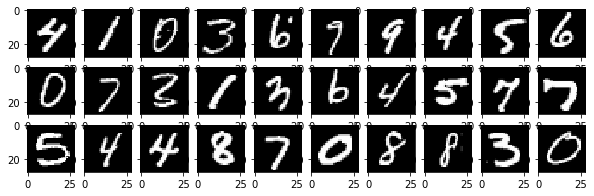

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 3) # set default size of plots

data, _ = mnist.train.next_batch(BatchSize)
data = data.reshape(BatchSize,28,28)
print(np.min(data),np.max(data))

# plot the images
for i in range(3):
    for j in range(10):
        plt.subplot(3, 10, i * 10 + j + 1)
        plt.imshow(data[i * 10 + j], cmap="gray",vmin=0,vmax=1)
plt.show()

In [39]:
BatchSize = 100
import os, time, itertools, imageio, pickle


In [ ]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

def Z_Generator():
    return np.random.normal(size=(BatchSize,1,1,100))

MasterZ = Z_Generator()

with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    train_set = tf.image.resize_images(mnist.train.images, [64, 64]).eval()
    train_set = (train_set - 0.5) / 0.5  # normalization; range: -1 ~ 1
    print('training start!')
    
    for epoch in range(train_epoch):
        G_losses = []
        D_losses = []
        epoch_start_time = time.time()
        for iter in range(mnist.train.num_examples // batch_size):
            # update discriminator
            x_ = train_set[iter*batch_size:(iter+1)*batch_size]
            
            z_ = np.random.normal(0, 1, (batch_size, 1, 1, 100))
            
            
            D_loss_value, _ = sess.run([D_loss, D_train_op], {real_img: x_, Z: z_, isTrain: True})
            D_losses.append(D_loss_value)

            # update generator
            z_ = np.random.normal(0, 1, (batch_size, 1, 1, 100))
            G_loss_value, _ = sess.run([G_loss, G_train_op], {Z: z_, real_img: x_, isTrain: True})
            G_losses.append(G_loss_value)

            if iter % 100 == 0:
                print("="*30 + str(iter) + "="*30)
                print("D loss = %f\tG loss=%f"%(D_loss_value,G_loss_value))
                images = sess.run(fake_img, {Z: MasterZ, isTrain: False})
                # plot the images
                for i in range(3):
                    for j in range(10):
                        plt.subplot(3, 10, i * 10 + j + 1)
                        plt.imshow(np.reshape(images[i * 10 + j], (64, 64)), cmap="gray")
                plt.show()
        
    epoch_end_time = time.time()
    per_epoch_ptime = epoch_end_time - epoch_start_time

sess.close()